In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


from dataloaders import get_quartet_dataloader

/home/levibaljer/anaconda3/envs/unet_old/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train_loader, val_loader = get_quartet_dataloader(train_dir = '/media/hdd/levibaljer/KhulaFinal/Fold1/train/preprocessed_h5_train', val_dir = '/media/hdd/levibaljer/KhulaFinal/Fold2/val/preprocessed_h5_val', batch_size = 1, output_dir='/media/hdd/levibaljer/UNet_old/Fold2')

['Sub02.h5', 'Sub04.h5', 'Sub05.h5', 'Sub08.h5', 'Sub12.h5', 'Sub13.h5', 'Sub14.h5', 'Sub15.h5', 'Sub17.h5', 'Sub19.h5', 'Sub20.h5', 'Sub23.h5', 'Sub25.h5', 'Sub26.h5', 'Sub27.h5', 'Sub31.h5', 'Sub32.h5', 'Sub37.h5', 'Sub38.h5', 'Sub39.h5', 'Sub41.h5', 'Sub42.h5', 'Sub44.h5', 'Sub45.h5', 'Sub46.h5', 'Sub50.h5', 'Sub51.h5', 'Sub52.h5', 'Sub53.h5', 'Sub54.h5', 'Sub56.h5', 'Sub57.h5', 'Sub61.h5', 'Sub62.h5', 'Sub63.h5']

 
 h5 Files, len list 35
Loading 35 quartets 
 


 rm test, size LF images (35, 3, 160, 160, 160)

 rm test, size HF image (35, 1, 160, 160, 160)
['Sub03.h5', 'Sub18.h5', 'Sub27.h5', 'Sub43.h5', 'Sub54.h5', 'Sub56.h5', 'Sub62.h5']

 
 h5 Files, len list 7
Loading 7 quartets 
 


 rm test, size LF images (7, 3, 160, 160, 160)

 rm test, size HF image (7, 1, 160, 160, 160)


In [7]:
def get_data():
    for i, data in enumerate(train_loader):
        print(i)
        print(len(data))
        break
    return data

In [8]:
import matplotlib.pyplot as plt
data = get_data()

0
2


In [9]:
print(data[0].shape)
print(data[1].shape)

torch.Size([1, 3, 160, 160, 160])
torch.Size([1, 1, 160, 160, 160])


In [12]:
LF = data[0][:,0,:,:,:].unsqueeze(1)
HF = data[1]

In [13]:
print(LF.shape)
print(HF.shape)

torch.Size([1, 1, 160, 160, 160])
torch.Size([1, 1, 160, 160, 160])


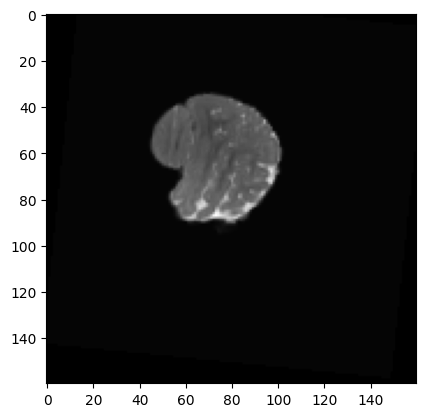

In [14]:
plt.imshow(data[1][0,0,110,:,:], cmap='gray')

In [2]:
import lpips
import numpy as np

In [15]:
def randomSlices(img_gt, img_pred):
    dim1_gt = []
    dim2_gt = []
    dim3_gt = []

    dim1_pred = []
    dim2_pred = []
    dim3_pred = []

    for i in range(2):
        dim1Slice = np.random.randint(50, 120)
        dim2Slice = np.random.randint(40, 110)
        dim3Slice = np.random.randint(40, 100)

        dim1_gt.append(img_gt[:, :, dim1Slice, :, :])
        dim2_gt.append(img_gt[:, :, :, dim2Slice, :])
        dim3_gt.append(img_gt[:, :, :, :, dim3Slice])

        dim1_pred.append(img_pred[:, :, dim1Slice, :, :])
        dim2_pred.append(img_pred[:, :, :, dim2Slice, :])
        dim3_pred.append(img_pred[:, :, :, :, dim3Slice])

    finalList_gt = dim1_gt + dim2_gt + dim3_gt
    finalList_pred = dim1_pred + dim2_pred + dim3_pred
   
    torchList_gt = []
    torchList_pred = []

    for i in range(len(finalList_gt)):
        new_torch_gt = (finalList_gt[i] * 2) - 1
        new_torch_pred = (finalList_pred[i] * 2) - 1
        
        new_torch_gt = new_torch_gt.expand(1, 3, 160, 160)
        new_torch_pred = new_torch_pred.expand(1, 3, 160, 160)
       
        torchList_gt.append(new_torch_gt)
        torchList_pred.append(new_torch_pred)
   
    finalTorchGT = torch.concat(torchList_gt, dim=0)
    finalTorchpred = torch.concat(torchList_pred, dim=0)
    
    return finalTorchGT, finalTorchpred

In [16]:
slicesGT, slicesPred = randomSlices4(HF, LF)

In [17]:
print(slicesGT.shape)

torch.Size([6, 3, 160, 160])


In [19]:
loss_fn = lpips.LPIPS(net='alex')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/levibaljer/anaconda3/envs/unet_old/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/levibaljer/anaconda3/envs/unet_old/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/levibaljer/anaconda3/envs/unet_old/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


/home/levibaljer/anaconda3/envs/unet_old/lib/python3.12/site-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model

In [20]:
d = loss_fn.forward(slicesGT,slicesPred)
print(d)
print(torch.mean(d))

tensor([[[[0.0789]]],


        [[[0.0974]]],


        [[[0.0999]]],


        [[[0.0883]]],


        [[[0.0801]]],


        [[[0.0709]]]], grad_fn=<AddBackward0>)
tensor(0.0859, grad_fn=<MeanBackward0>)


In [21]:
mse = torch.nn.MSELoss()

In [22]:
print(mse(HF, LF))

tensor(0.0015)
